# pandasを使ったデータ確認
https://biz.quest.signate.jp/quests/10007

In [24]:
import pandas as pd
hoikuen = pd.read_csv('hoikuen.csv',encoding='shift_jis')
print(hoikuen)

     No.                    施設名                         施設名（英語）      郵便番号  \
0      1                  藍染保育園     Aizome Child Daycare Center  113-0031   
1      2                  久堅保育園   Hisakata Child Daycare Center  112-0002   
2      3                  青柳保育園     Aoyagi Child Daycare Center  112-0014   
3      4                さしがや保育園  Sashigaya Child Daycare Center  112-0001   
4      5                  駒込保育園   Komagome Child Daycare Center  113-0022   
..   ...                    ...                             ...       ...   
122  123          家庭的保育室プチ・アンジュ                             NaN  112-0003   
123  124  国立大学法人東京医科歯科大学わくわく保育園                             NaN  113-0034   
124  125        ちいさいおうち春日とモーハウス                             NaN  112-0003   
125  126                 モニカ茗荷谷                             NaN  112-0002   
126  127            グローバルキッズ春日園                             NaN  112-0003   

                                住所         緯度          経度          電話番号  \


In [6]:
######## データの基本統計量確認
import pandas as pd
hoikuen = pd.read_csv('hoikuen.csv',encoding='shift_jis')

# 保育園のデータの列数を出力
print(len(hoikuen.columns))

# 保育園のデータの列名リストをcols_listに代入
cols_list = hoikuen.columns

19


In [ ]:
######## データの並び替え
import pandas as pd
hoikuen = pd.read_csv('hoikuen.csv',encoding='shift_jis')

hoikuen.sort_values(by=['カテゴリ１', 'カテゴリ２'],ascending=[True,True])
print(hoikuen)

In [14]:
######## データの選択を行う1
import pandas as pd
hoikuen = pd.read_csv('hoikuen.csv',encoding='shift_jis')

# 公私区分と認可区分以外の列を抽出し、df1に代入
df1 = hoikuen[['No.', '施設名', '合計園児定員（名）', '０歳児定員（名）', '１歳児定員（名）','２歳児定員（名）', '３歳児定員（名）', '４・５歳児定員（名）']]
# 1−2行目と5行目を抽出し、df2
df2 = hoikuen.iloc[[0,1,4]]
# 3行目の施設名と公私区分の列を抽出し、Series型としてser3に代入
ser3 = ser3 = hoikuen.iloc[2][[1,2]]
print(ser3)

施設名                              青柳保育園
施設名（英語）    Aoyagi Child Daycare Center
Name: 2, dtype: object


In [ ]:
######## データの選択を行う2
import pandas as pd
hoikuen = pd.read_csv('hoikuen.csv',encoding='shift_jis')
print(len(hoikuen))
print(hoikuen)
print(hoikuen[hoikuen['施設名'].str.contains('保育園')]) # 文字列の要素に対してある文字列を含むデータを抽出

In [19]:
######## データの集約の確認
import pandas as pd
hoikuen = pd.read_csv('hoikuen.csv',encoding='shift_jis')
hoikuen.groupby(['カテゴリ１']).agg(['count','max', 'min', 'sum'])[['２歳児定員（名）','４・５歳児定員（名）']]

２歳児定員（名）                    ４・５歳児定員（名）                   
         count   max  min     sum      count   max  min     sum
カテゴリ１                                                          
区立保育園       21  25.0  8.0   370.0         20  60.0  0.0   777.0
私立保育園      105  18.0  1.0  1051.0         71  50.0  0.0  1915.0

In [22]:
######## データの要約統計量の確認
import pandas as pd
hoikuen = pd.read_csv('hoikuen.csv',encoding='shift_jis')

print(type(hoikuen.describe()))
df1 = hoikuen.describe()[['０歳児定員（名）','１歳児定員（名）']]
print(df1)

<class 'pandas.core.frame.DataFrame'>
         ０歳児定員（名）    １歳児定員（名）
count  113.000000  126.000000
mean     6.663717   10.079365
std      3.121385    4.194479
min      0.000000    1.000000
25%      6.000000    8.000000
50%      6.000000   10.000000
75%      9.000000   12.000000
max     18.000000   23.000000


# pandasを使ったデータ操作

In [25]:
######## 新しい列、行の追加
import pandas as pd
hoikuen = pd.read_csv('hoikuen.csv',encoding='shift_jis')

# データの末尾に追加
# 例とやつとデータ構成が異なっておりエラーとなるのでコメントアウト
# hoikuen.loc[58] = [59, 'SIGNATE保育園', '区立保育園', '認可保育園', 100, 20.0, 20.0, 20.0, 20.0, 20.0]
# df1 = hoikuen.copy()

# 新しい列所属区を追加し、値は文京区の文字列を追加
hoikuen['所属区'] = '文京区'
df2 = hoikuen.copy()

In [26]:
######## 既存の列、行の削除とデータの修正
import pandas as pd
hoikuen = pd.read_csv('hoikuen.csv',encoding='shift_jis')

# 園児の定員に関するカラムを全て削除し、hoikuen_copy1に読み込み
hoikuen_copy1 = hoikuen[[col for col in hoikuen.columns if '定員' not in col]]

# 施設名が久堅保育園であるデータを削除し、hoikuen_copy2に読み込み
hoikuen_copy2 = hoikuen[hoikuen['施設名'] !='久堅保育園']

In [ ]:
######## データの結合例
# データ構成が異なっているので
# import pandas as pd
# hoikuen = pd.read_csv('hoikuen.csv',encoding='shift_jis')
# hoikuen_detail = pd.read_csv('hoikuen_dummy_detail.csv',encoding='shift_jis')

# df_all = pd.merge(hoikuen,hoikuen_detail)

# print(df_all[df_all['土日祝日対応可否']=='可'].shape[0])

# df_all['園児1人あたりの最低保育士人数'] = df_all['最低保育士人数']/df_all['合計園児定員']
# print(df_all[df_all['施設名']=='藍染保育園']['園児1人あたりの最低保育士人数'])

# print(df_all[df_all['施設名']=='モニカ茗荷谷']['補助有無'])

# pandasでのデータ可視化

c:\Users\nakamura\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


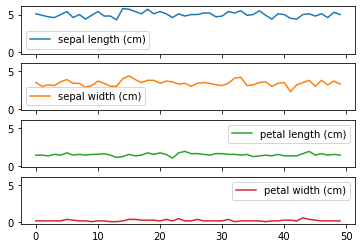

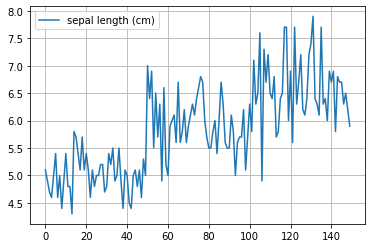

In [1]:
######## pandasでのデータ可視化
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.loc[df_iris['target'] == 0, 'target'] = "setosa"
df_iris.loc[df_iris['target'] == 1, 'target'] = "versicolor"
df_iris.loc[df_iris['target'] == 2, 'target'] = "virginica"

# Q1
df_iris_setosa = df_iris[df_iris['target']=="setosa"]
df_iris_setosa.plot(subplots=True,sharey=True)
plt.show()

# Q2
df_iris.plot(y='sepal length (cm)',grid=True,legend=True)
plt.show()


c:\Users\nakamura\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


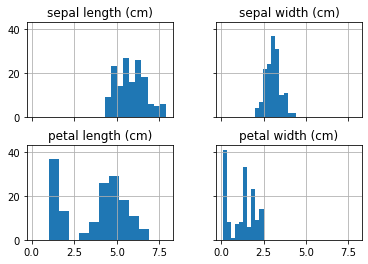

In [1]:
######## pandasを使ってのヒストグラム作成
# pandasのインポート
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.loc[df_iris['target'] == 0, 'target'] = "setosa"
df_iris.loc[df_iris['target'] == 1, 'target'] = "versicolor"
df_iris.loc[df_iris['target'] == 2, 'target'] = "virginica"

# Q1
df_iris.hist(sharey=True,sharex=True)
plt.show()

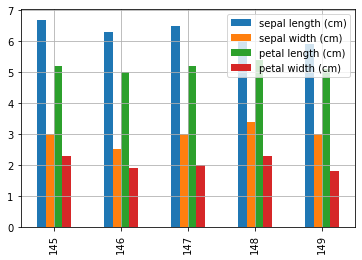

In [2]:
######## pandasを使っての棒グラフ作成
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.loc[df_iris['target'] == 0, 'target'] = "setosa"
df_iris.loc[df_iris['target'] == 1, 'target'] = "versicolor"
df_iris.loc[df_iris['target'] == 2, 'target'] = "virginica"

# Q1
df_iris_end5 = df_iris.tail(5)
df_iris_end5.plot.bar(grid=True)
plt.show()